<h3>Importing Libraries</h3>
<p>In this cell, the necessary Python libraries such as pandas, yfinance, and datetime are imported for data handling and time series analysis.</p>

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

<h3>Data Collection</h3>
<p>This cell retrieves historical stock market data for Google (GOOG) from Yahoo Finance API. It defines the date range for data collection and selects relevant columns.</p>

In [2]:
today = date.today()
end_date = today.strftime("%Y-%m-%d")

d1 = date.today() - timedelta(days=365)
start_date = d1.strftime("%Y-%m-%d")

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
df = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-10-06  134.940002  139.186005  134.940002  138.729996  138.729996   
247 2023-10-09  137.990005  139.970001  136.699997  139.500000  139.500000   
248 2023-10-10  139.509995  140.740005  138.429993  139.199997  139.199997   
249 2023-10-11  139.850006  142.220001  139.839996  141.699997  141.699997   
250 2023-10-12  142.160004  142.380005  139.449997  140.289993  140.289993   

       Volume  
246  20819300  
247  16599100  
248  19554900  
249  20146300  
250  18151300  


<h3>Data Preprocessing</h3>
<p>Here, the data is further preprocessed. It narrows down the dataset to include only the 'Date' and 'Close' columns. The code also resets the index for data consistency.</p>

In [3]:
df = df[["Date", "Close"]]
print(df.head())

        Date       Close
0 2022-10-13   99.709999
1 2022-10-14   97.180000
2 2022-10-17  100.779999
3 2022-10-18  101.389999
4 2022-10-19  100.290001


<h3>Data Visualization</h3>
<p>This cell uses the matplotlib library to create a time series plot of the closing prices of Google's stock. The 'fivethirtyeight' style is applied for visualization.</p>

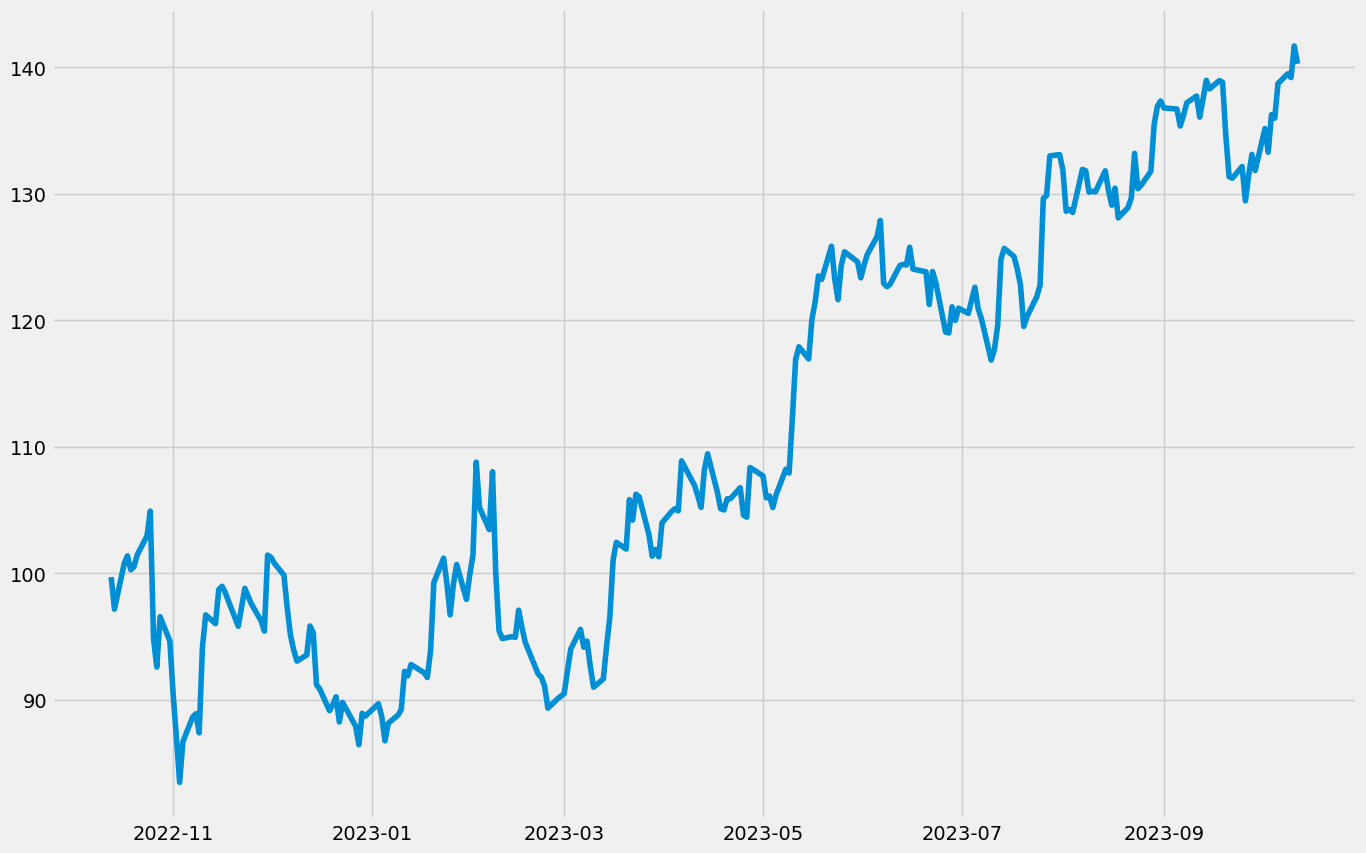

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(df["Date"], df["Close"])

<h3>Time Series Decomposition</h3>
<p>The statsmodels library is utilized for seasonal decomposition. This cell separates the trend, seasonality, and residual components of the stock prices.</p>

<Figure size 640x480 with 0 Axes>

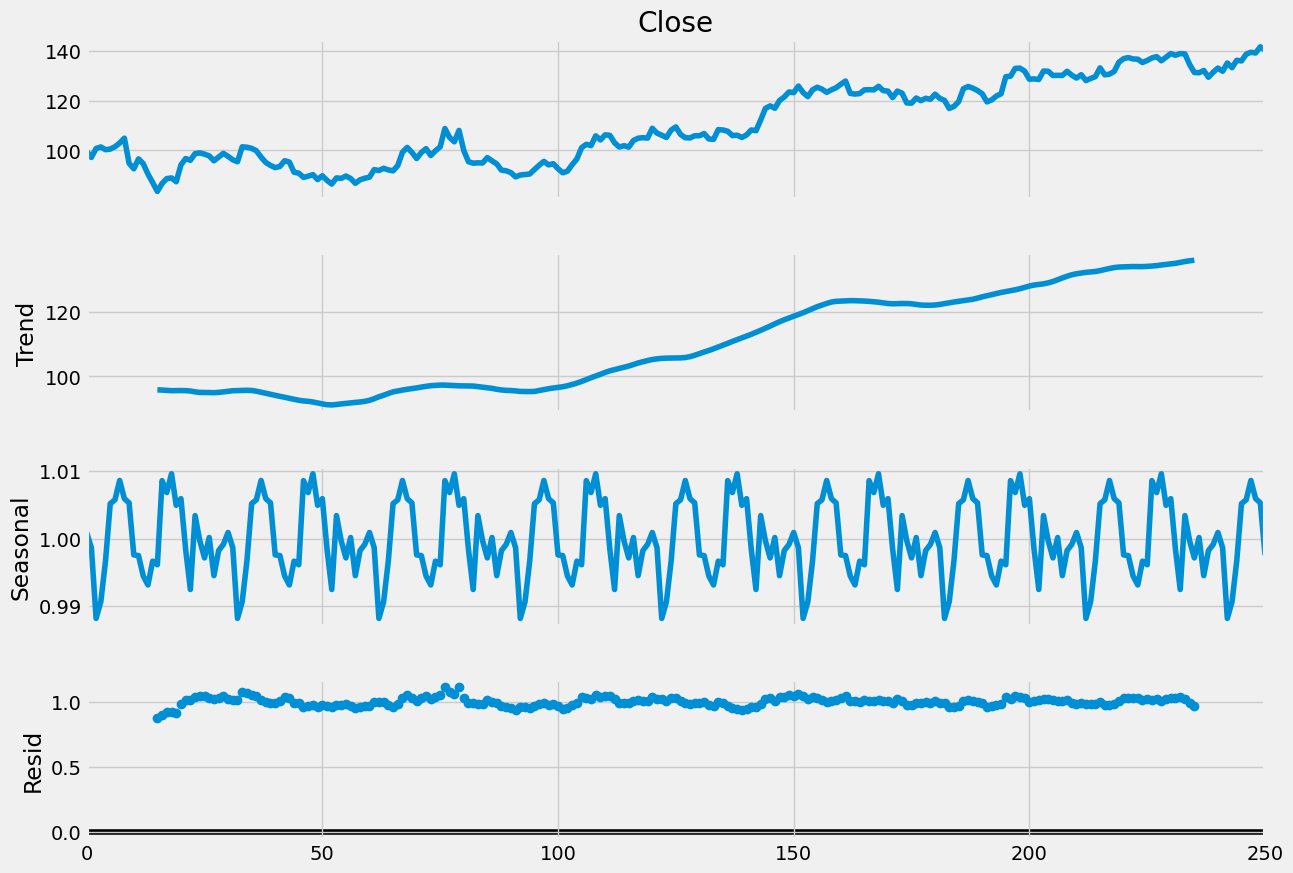

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<h3>AutoCorrelation Plot</h3>
<p>AutoCorrelation is visualized using the pandas library, helping identify potential time series patterns.</p>

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

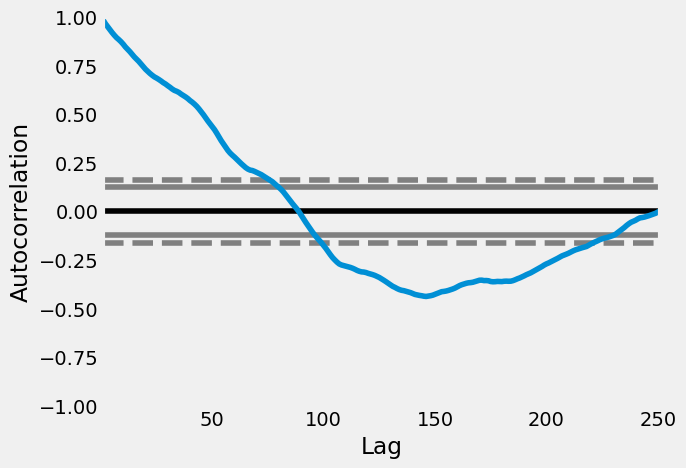

In [6]:
pd.plotting.autocorrelation_plot(df["Close"])

<h3>Partial AutoCorrelation Plot</h3>
<p>This cell generates the Partial AutoCorrelation Function (PACF) plot to aid in parameter selection for the ARIMA model.</p>

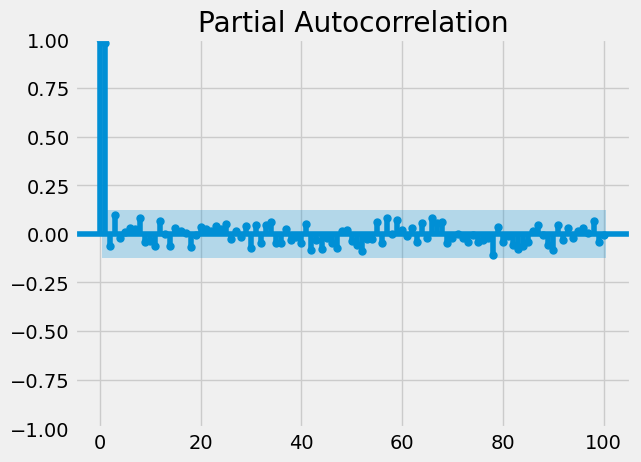

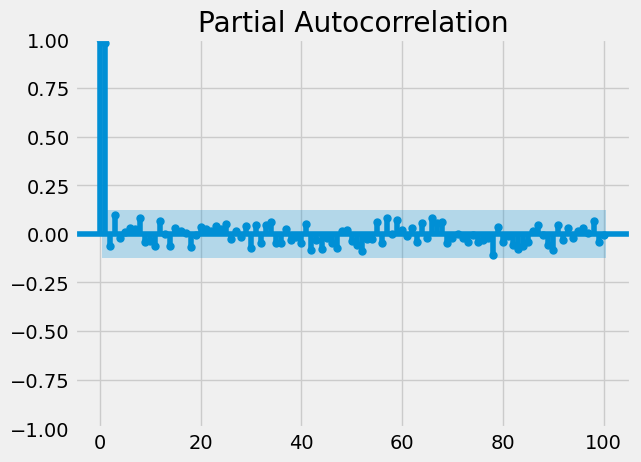

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Close"], lags = 100)

<h3>ARIMA Modeling</h3>
<p>The ARIMA (AutoRegressive Integrated Moving Average) model is constructed here. It fits the model to the 'Close' prices with specified parameters and prints a summary of the model.</p>

In [8]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -558.414
Date:                Fri, 13 Oct 2023   AIC                           1132.827
Time:                        16:35:49   BIC                           1160.999
Sample:                             0   HQIC                          1144.166
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1206     11.319      0.011      0.991     -22.065      22.306
ar.L2          0.6667     10.924      0.061      0.951     -20.745      22.078
ar.L3         -0.0189      1.635     -0.012      0.9

<h3>ARIMA Predictions</h3>
<p>This cell generates predictions using the ARIMA model and prints the results.</p>

In [9]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1       99.710021
2       97.073195
3      101.192961
4      101.037772
          ...    
246    135.621866
247    138.911574
248    139.193890
249    139.070908
250    141.739187
Name: predicted_mean, Length: 251, dtype: float64


<h3>SARIMAX Predictions</h3>
<p>Predictions for future stock prices are generated using the SARIMAX model.</p>

In [10]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26033D+00    |proj g|=  1.24329D-01


 This problem is unconstrained.



At iterate    5    f=  2.18847D+00    |proj g|=  2.28583D-02

At iterate   10    f=  2.17905D+00    |proj g|=  5.47501D-02

At iterate   15    f=  2.17302D+00    |proj g|=  3.87312D-03

At iterate   20    f=  2.17278D+00    |proj g|=  2.26801D-03

At iterate   25    f=  2.17250D+00    |proj g|=  7.25772D-04

At iterate   30    f=  2.17250D+00    |proj g|=  1.64360D-04

At iterate   35    f=  2.17250D+00    |proj g|=  9.07743D-05

At iterate   40    f=  2.17250D+00    |proj g|=  5.95405D-04

At iterate   45    f=  2.17244D+00    |proj g|=  3.79971D-03

At iterate   50    f=  2.17233D+00    |proj g|=  1.35509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -545.254
Date:                            Fri, 13 Oct 2023   AIC                           1120.507
Time:                                    16:36:44   BIC                           1172.592
Sample:                                         0   HQIC                          1141.498
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1319      1.018     -0.130      0.897      -2.127       1.863
ar.L2          0.4633      0.803   

<h3>Data and Predictions Visualization</h3>
<p>The cell plots the training data and the predictions on a single graph for visual comparison.</p>

In [11]:
# Generate predictions using the SARIMAX model

start_date = (df["Date"].iloc[-1] + pd.Timedelta(days=1)).strftime("%Y-%m-%d")
date_range = pd.date_range(start=start_date, periods=100, freq="D")
predictions = model.predict(len(df), len(df) + 99)
                            
predictions.index = date_range
print(predictions)

2023-10-13    140.717160
2023-10-14    142.150908
2023-10-15    140.806424
2023-10-16    140.848987
2023-10-17    140.422437
                 ...    
2024-01-16    160.846313
2024-01-17    161.847326
2024-01-18    162.425272
2024-01-19    161.922579
2024-01-20    162.544731
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


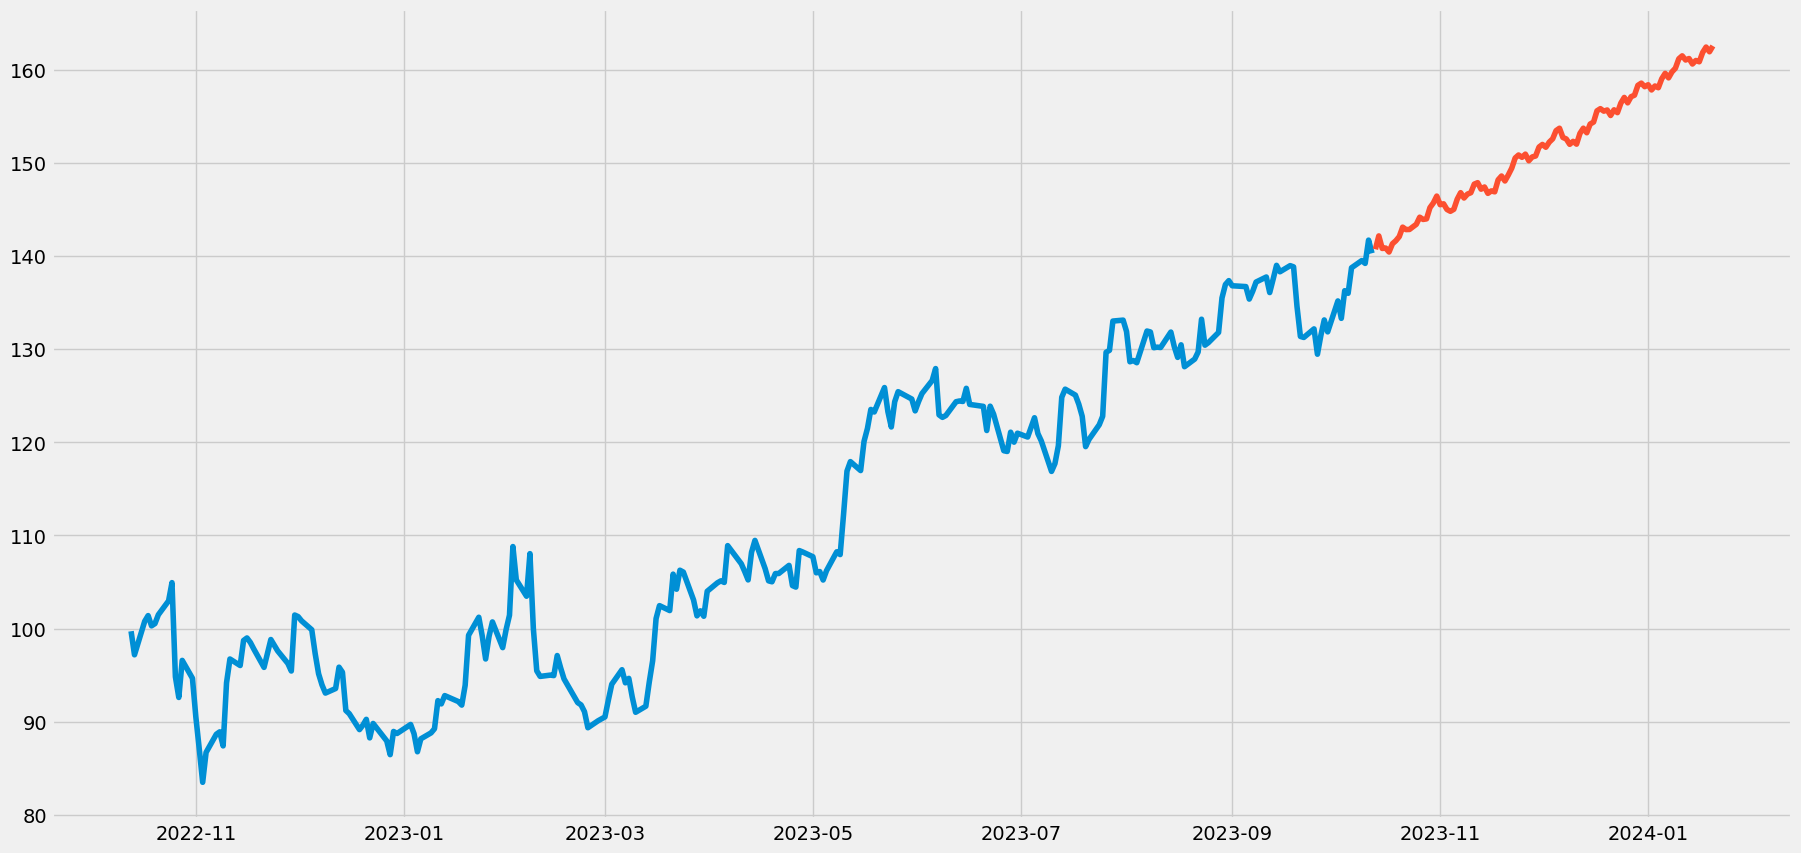

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Close"])
plt.plot(predictions)